In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_columns', 40)



In [2]:
df = pd.read_csv('train.csv', header = 0)
print('The shape of the training dataset is:', df.shape)
df.rename(columns= lambda x: x.lower(), inplace = True)
df.set_index('passengerid', inplace=True)
df.dtypes

The shape of the training dataset is: (891, 12)


survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

survived     0.00
pclass       0.00
name         0.00
sex          0.00
age         19.87
sibsp        0.00
parch        0.00
ticket       0.00
fare         0.00
cabin       77.10
embarked     0.22
dtype: float64

In [5]:
 df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#checking for any duplicate passengers
df[df.duplicated(keep=False, subset = ['name'])]
#none were found

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,


In [7]:
df.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [8]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [9]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

(array([ 44.,  20.,  19.,  96., 122., 108.,  88.,  67.,  47.,  39.,  24.,
         18.,  14.,   3.,   4.,   1.]),
 array([ 0.42,  5.42, 10.42, 15.42, 20.42, 25.42, 30.42, 35.42, 40.42,
        45.42, 50.42, 55.42, 60.42, 65.42, 70.42, 75.42, 80.42]),
 <a list of 16 Patch objects>)

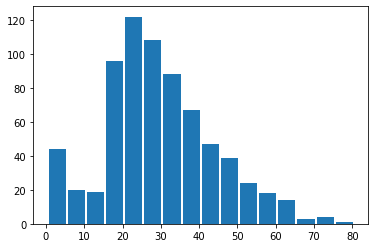

In [10]:
bins=np.arange(df.age.min(),df.age.max()+5,5)
plt.hist(data=df,x='age',bins=bins, rwidth=.9)

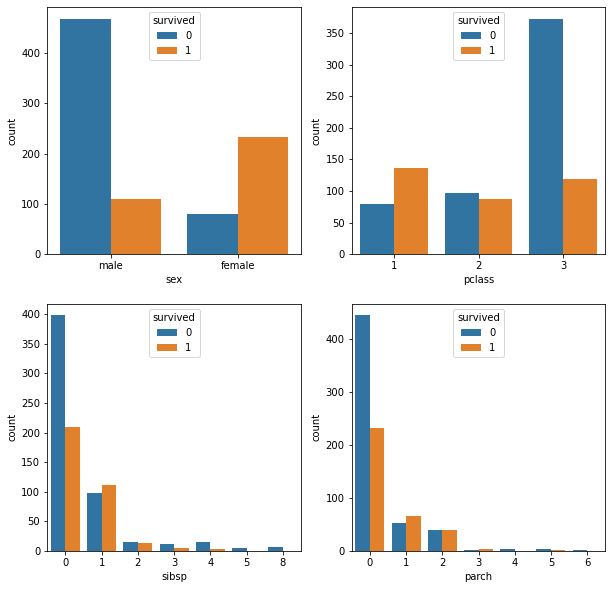

In [11]:
cols = ["sex", "pclass", "sibsp", "parch"]
n_rows = 2
n_cols = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 5, n_rows*5)) 

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols +c
        ax = axs[r][c]
        sns.countplot(df[cols[i]], hue=df['survived'], ax=ax)
        ax.legend(title = 'survived', loc = 'upper center')

plt.show()

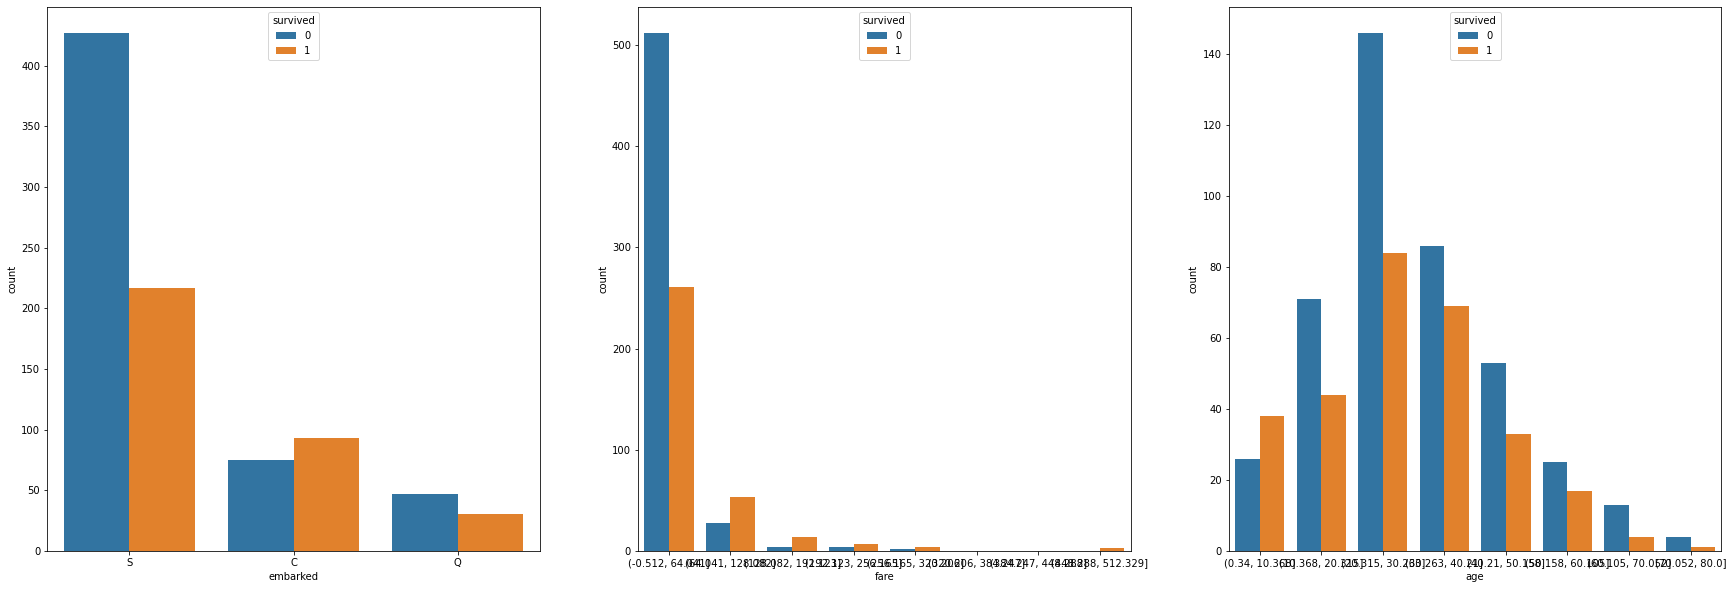

(-0.512, 64.041]      773
(64.041, 128.082]      80
(128.082, 192.123]     18
(192.123, 256.165]     11
(256.165, 320.206]      6
(448.288, 512.329]      3
(384.247, 448.288]      0
(320.206, 384.247]      0
Name: fare, dtype: int64

(20.315, 30.263]    230
(30.263, 40.21]     155
(10.368, 20.315]    115
(40.21, 50.158]      86
(0.34, 10.368]       64
(50.158, 60.105]     42
(60.105, 70.052]     17
(70.052, 80.0]        5
Name: age, dtype: int64


In [12]:
cols = ["embarked", "fare", "age"]
discrete = df.copy()
discrete ['fare'] = pd.cut(discrete['fare'], bins=8) # discretised
discrete['age'] = pd.cut(discrete['age'], bins=8) # discretised

n_rows = 1
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize = (n_cols * 10, n_rows*10)) 

for c in range(0, n_cols):
    i = c
    ax = axs[c]
    sns.countplot(discrete[cols[i]], hue=discrete['survived'], ax=ax)
    ax.legend(title = 'survived', loc = 'upper center')

plt.show()
print(discrete.fare.value_counts())
print("")
print(discrete.age.value_counts())

# finished exploring the data.
## problems to be handeled:
- drop the "cabin" column, since over 77% of it is null values.
- drop the rows that have null in the "embarked" column
- fill the null values of age with the mean.
- drop all the trivial features i.e (name, ticket) 
- move survived column to the very right (just for readability)

In [13]:
df_copy=df.copy()

In [14]:
#dropped the cabin column & the trivial features
df.drop(['cabin', 'name', 'ticket'], axis = 1, inplace=True)

In [15]:
df = df.dropna(subset=['embarked'])
print(len(df))
df['age'] = df['age'].fillna(df['age'].mean())
df['age'].value_counts

889


<bound method IndexOpsMixin.value_counts of passengerid
1      22.000000
2      38.000000
3      26.000000
4      35.000000
5      35.000000
         ...    
887    27.000000
888    19.000000
889    29.642093
890    26.000000
891    32.000000
Name: age, Length: 889, dtype: float64>

In [16]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

survived    0.0
pclass      0.0
sex         0.0
age         0.0
sibsp       0.0
parch       0.0
fare        0.0
embarked    0.0
dtype: float64

In [17]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked
passengerid,,,,,,,,
1,0,3,male,22.000000,1,0,7.2500,S
2,1,1,female,38.000000,1,0,71.2833,C
3,1,3,female,26.000000,0,0,7.9250,S
4,1,1,female,35.000000,1,0,53.1000,S
5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.000000,0,0,13.0000,S
888,1,1,female,19.000000,0,0,30.0000,S
889,0,3,female,29.642093,1,2,23.4500,S


In [18]:
#removing survived column then adding it at the end
df = df.drop(columns=['survived']).assign(survived = df['survived'])

In [19]:
df.dtypes

pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
survived      int64
dtype: object

In [20]:
#hot_one encoding for the categorical data
df_enc = pd.get_dummies(df, columns=['pclass', 'sex', 'embarked'], drop_first=True)
df_enc = df_enc.drop(columns=['survived']).assign(survived = df['survived'])
df_enc.head()

,age,sibsp,parch,fare,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S,survived
passengerid,,,,,,,,,,
1,22.0,1,0,7.2500,0,1,1,0,1,0
2,38.0,1,0,71.2833,0,0,0,0,0,1
3,26.0,0,0,7.9250,0,1,0,0,1,1
4,35.0,1,0,53.1000,0,0,0,0,1,1
5,35.0,0,0,8.0500,0,1,1,0,1,0


In [21]:
from sklearn.model_selection import train_test_split

X_full, y_full= df_enc.iloc[:,:-1] ,df_enc.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(df_enc.iloc[:,:-1],df_enc.iloc[:,-1] ,test_size=0.3, shuffle=True, 
                                         random_state=13,stratify=df_enc.iloc[:,-1])

X_val, X_test, y_val, y_test = train_test_split(X_test,y_test ,test_size=0.5, shuffle=True, 
                                          random_state=13,stratify=y_test)

In [22]:
X_train

,age,sibsp,parch,fare,pclass_2,pclass_3,sex_male,embarked_Q,embarked_S
passengerid,,,,,,,,,
147,27.000000,0,0,7.7958,0,1,1,0,1
679,43.000000,1,6,46.9000,0,1,0,0,1
435,50.000000,1,0,55.9000,0,0,1,0,1
407,51.000000,0,0,7.7500,0,1,1,0,1
512,29.642093,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
231,35.000000,1,0,83.4750,0,0,0,0,1
723,34.000000,0,0,13.0000,1,0,1,0,1
668,29.642093,0,0,7.7750,0,1,1,0,1


In [23]:
y_train

passengerid
147    1
679    0
435    0
407    0
512    0
      ..
231    1
723    0
668    0
722    0
390    1
Name: survived, Length: 622, dtype: int64

In [24]:
y_train.sum()/y_train.shape[0]

0.38263665594855306

In [25]:
y_train.shape

(622,)

In [26]:
y_test.shape

(134,)

In [27]:
y_test.sum()/y_test.shape[0]

0.3805970149253731

# importing the learning models 
- Logistic regression
- Decision tree
- Random forest

### 1) Logistic Regression model
###### using train-test split

In [28]:
from sklearn.linear_model import LogisticRegression
#random initial hyper-parameters

clf = LogisticRegression(random_state=13,max_iter=1000,C=10,penalty='l2',solver='liblinear')

In [29]:
clf.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=1000, random_state=13, solver='liblinear')

In [30]:
clf.coef_

array([[-0.05366397, -0.35786326, -0.14465223,  0.00469385, -0.9124304 ,
        -2.21933999, -2.7094252 ,  0.16709454, -0.34986751]])

In [31]:
clf.intercept_

array([4.42327241])

In [32]:
#age, sibsp, parch, fare, pclass_2, pclass_3, sex_male, embarked_Q, embarked_S
x1,x2,x3,x4,x5,x6,x7,x8,x9 = 22, 1, 0, 100, 0, 0, 0, 1, 0
z= 4.41956736 -0.04872341*x1 -0.33727231*x2 -0.1888914*x3  +0.0039606*x4 -0.96516094*x5  -2.22333878*x6 -2.77293087*x7 +0.10868992*x8 -0.39663222*x9
y= (1/(1+np.exp(-z)))*100
print("chance of survival= "+str(round(y, 2))+" %") 

chance of survival= 97.11 %


In [33]:
from sklearn.metrics import accuracy_score
logisticRegression_acc=accuracy_score(y_test, clf.predict(X_test))
print(logisticRegression_acc)

0.8208955223880597


In [34]:
from sklearn.metrics import recall_score
logisticRegression_recall = recall_score(y_test, clf.predict(X_test))
print(logisticRegression_recall)

0.7058823529411765


In [35]:
from sklearn.metrics import precision_score
logisticRegression_precision = precision_score(y_test, clf.predict(X_test))
print(logisticRegression_precision)

0.8


In [36]:
#tuning the hyper-parameters using grid search
C_values = [0.01, 0.1, 1, 5, 10, 20, 100]
max_iter_values = [200, 400, 800, 1600]

best_scores = []
different_parameters = []
for i in C_values:
    for j in max_iter_values:
        clf = LogisticRegression(random_state=13, max_iter=j, C=i, penalty='l2', solver='liblinear')
        clf.fit(X_train,y_train)
        log_scores = accuracy_score(y_val, clf.predict(X_val))
        best_scores.append(log_scores)
        different_parameters.append(str(i) + ", " + str(j))
print(best_scores)        

[0.6992481203007519, 0.6992481203007519, 0.6992481203007519, 0.6992481203007519, 0.7518796992481203, 0.7518796992481203, 0.7518796992481203, 0.7518796992481203, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.7368421052631579, 0.706766917293233, 0.706766917293233, 0.706766917293233, 0.706766917293233, 0.706766917293233, 0.706766917293233, 0.706766917293233, 0.706766917293233, 0.706766917293233, 0.706766917293233, 0.706766917293233, 0.706766917293233, 0.706766917293233, 0.706766917293233, 0.706766917293233, 0.706766917293233]


Text(0, 0.5, 'test-train split Accuracy')

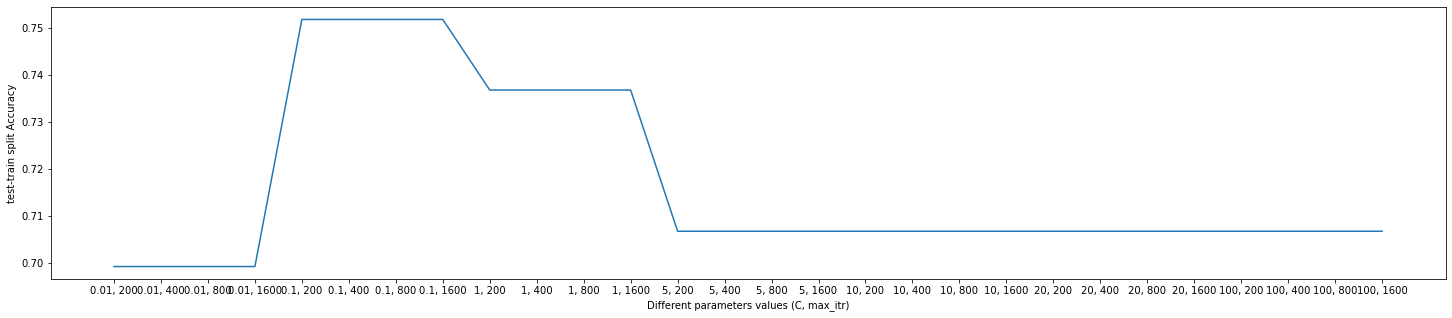

In [37]:
plt.figure(figsize=(25,5))
plt.plot(different_parameters, best_scores)
plt.xlabel("Different parameters values (C, max_itr)")
plt.ylabel("test-train split Accuracy")

In [38]:
#using the best hyper parameters from the figure above (C = 0.1 & any number of iterations):
clf = LogisticRegression(random_state=13,max_iter=400,C=0.1,penalty='l2',solver='liblinear')
clf.fit(X_train,y_train)

logisticRegression_acc = accuracy_score(y_test, clf.predict(X_test))
logisticRegression_recall = recall_score(y_test, clf.predict(X_test))
logisticRegression_precision = precision_score(y_test, clf.predict(X_test))

print(logisticRegression_acc)
print(logisticRegression_recall)
print(logisticRegression_precision)


0.7910447761194029
0.5686274509803921
0.8285714285714286



###### using cross-validation 

In [39]:
#random initial hyper-parameters
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


logistic = LogisticRegression(random_state=13,max_iter=1000,C=10,penalty='l2',solver='liblinear')
log_scores = cross_val_score(logistic, X_train, y_train, cv=10, scoring='accuracy')
print (log_scores)
logistic.fit(X_train, y_train)

[0.76190476 0.82539683 0.83870968 0.75806452 0.82258065 0.82258065
 0.87096774 0.83870968 0.83870968 0.80645161]


LogisticRegression(C=10, max_iter=1000, random_state=13, solver='liblinear')

In [40]:
print (log_scores.mean())
print (accuracy_score(y_test, logistic.predict(X_test)))

0.8184075780849973
0.8208955223880597


In [41]:
#tuning the hyper-parameters using grid search & cv

C_values = [0.01, 0.1, 1, 5, 10, 20, 100]
max_iter_values = [200, 400, 800, 1600]

best_scores = []
different_parameters = []
for i in C_values:
    for j in max_iter_values:
        logistic = LogisticRegression(random_state=13, max_iter=j, C=i, penalty='l2', solver='liblinear')
        log_scores = cross_val_score(logistic, X_full, y_full, cv=10, scoring='accuracy')
        best_scores.append(log_scores.mean())
        different_parameters.append(str(i) + ", " + str(j))
print(best_scores)        

[0.7255617977528089, 0.7255617977528089, 0.7255617977528089, 0.7255617977528089, 0.8087589376915219, 0.8087589376915219, 0.8087589376915219, 0.8087589376915219, 0.7997701736465782, 0.7997701736465782, 0.7997701736465782, 0.7997701736465782, 0.7998340143003064, 0.7998340143003064, 0.7998340143003064, 0.7998340143003064, 0.8009576098059243, 0.8009576098059243, 0.8009576098059243, 0.8009576098059243, 0.7987104187946884, 0.7987104187946884, 0.7987104187946884, 0.7987104187946884, 0.8009576098059243, 0.8009576098059243, 0.8009576098059243, 0.8009576098059243]


Text(0, 0.5, 'Cross-Validated Accuracy')

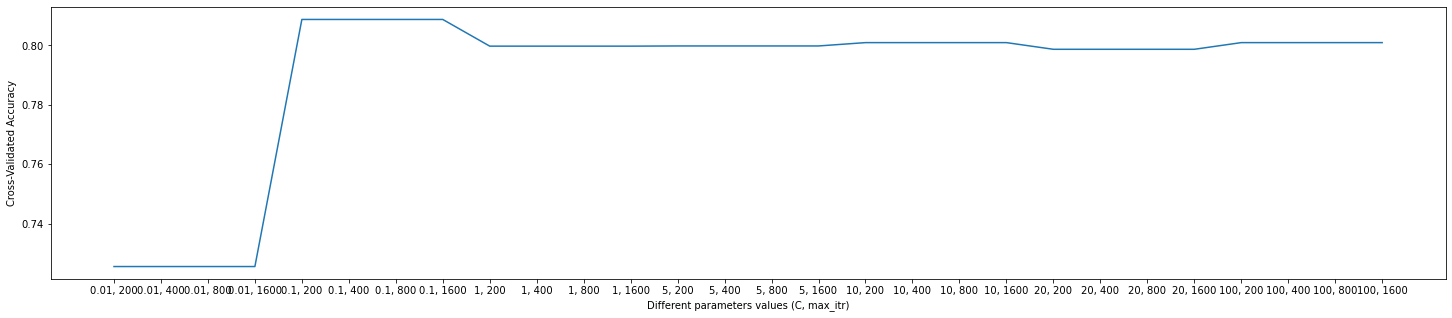

In [43]:
plt.figure(figsize=(25,5))
plt.plot(different_parameters, best_scores)
plt.xlabel("Different parameters values (C, max_itr)")
plt.ylabel("Cross-Validated Accuracy")

from the plot above we pick the values (c = 0.1 & max_itr = 400)

In [44]:
logistic = LogisticRegression(random_state=13, max_iter=400, C=0.1, penalty='l2', solver='liblinear')

y_pred = cross_val_predict(logistic,X_full, y_full, cv=10)
conf_mat = confusion_matrix(y_full, y_pred)
print(conf_mat)
print(classification_report(y_full, y_pred))
print("Cross-Validated Accuracy:", accuracy_score(y_full, y_pred))

cv_logisticRegression_acc = accuracy_score(y_full, y_pred)
cv_logisticRegression_recall = recall_score(y_full, y_pred)
cv_logisticRegression_precision = precision_score(y_full, y_pred)


[[497  52]
 [118 222]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       549
           1       0.81      0.65      0.72       340

    accuracy                           0.81       889
   macro avg       0.81      0.78      0.79       889
weighted avg       0.81      0.81      0.80       889

Cross-Validated Accuracy: 0.8087739032620922


### 2) Decision Tree Model

[Text(160.16224315068493, 207.55636363636364, 'X[6] <= 0.5\ngini = 0.472\nsamples = 622\nvalue = [384, 238]'),
 Text(79.11369863013698, 187.7890909090909, 'X[5] <= 0.5\ngini = 0.372\nsamples = 219\nvalue = [54, 165]'),
 Text(25.224657534246575, 168.0218181818182, 'X[0] <= 2.5\ngini = 0.094\nsamples = 122\nvalue = [6, 116]'),
 Text(13.758904109589041, 148.25454545454545, 'X[4] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(9.172602739726027, 128.48727272727274, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(18.345205479452055, 128.48727272727274, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(36.69041095890411, 148.25454545454545, 'X[0] <= 56.5\ngini = 0.08\nsamples = 120\nvalue = [5, 115]'),
 Text(27.517808219178082, 128.48727272727274, 'X[3] <= 29.356\ngini = 0.065\nsamples = 118\nvalue = [4, 114]'),
 Text(22.93150684931507, 108.72, 'X[3] <= 28.231\ngini = 0.15\nsamples = 49\nvalue = [4, 45]'),
 Text(18.345205479452055, 88.95272727272729, 'X[0] <= 37.0\ngini = 0.117\ns

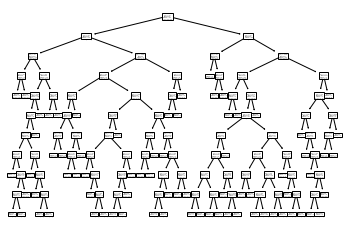

In [45]:
#random initial hyper-parameters

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf_2=DecisionTreeClassifier(max_depth=10, random_state=13)
clf_2.fit(X_train,y_train)
tree.plot_tree(clf_2)  

In [46]:
decisionTree_acc=accuracy_score(y_test, clf_2.predict(X_test))
print(decisionTree_acc)

0.7761194029850746


In [47]:
decisionTree_recall = recall_score(y_test, clf_2.predict(X_test))
print(decisionTree_recall)

0.803921568627451


In [48]:
decisionTree_precision = precision_score(y_test, clf_2.predict(X_test))
print(decisionTree_precision)

0.6721311475409836


In [53]:
#tuning the hyper-parameters using grid search
depth_values = range(1, 25)
best_scores = []
different_parameters = []
for j in depth_values:
    clf_2 = DecisionTreeClassifier(max_depth=j,  random_state=13)
    clf_2.fit(X_train,y_train)
    scores = accuracy_score(y_val, clf_2.predict(X_val))
    best_scores.append(scores)
    different_parameters.append(str(j))
print(best_scores)  


[0.7368421052631579, 0.7518796992481203, 0.7969924812030075, 0.7819548872180451, 0.7894736842105263, 0.7969924812030075, 0.7969924812030075, 0.8120300751879699, 0.7443609022556391, 0.7518796992481203, 0.7669172932330827, 0.7293233082706767, 0.7593984962406015, 0.7368421052631579, 0.7293233082706767, 0.7518796992481203, 0.7142857142857143, 0.706766917293233, 0.706766917293233, 0.7218045112781954, 0.7218045112781954, 0.7218045112781954, 0.7218045112781954, 0.7218045112781954]


Text(0, 0.5, 'test-train split Accuracy')

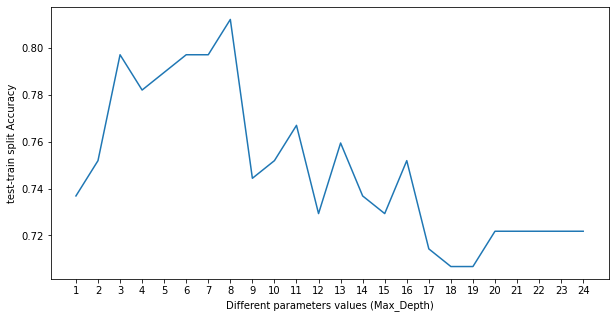

In [54]:
plt.figure(figsize=(10,5))
plt.plot(different_parameters, best_scores)
plt.xlabel("Different parameters values (Max_Depth)")
plt.ylabel("test-train split Accuracy")

In [55]:
clf_2 = DecisionTreeClassifier(max_depth=8,  random_state=13)
clf_2.fit(X_train,y_train)
decisionTree_acc = accuracy_score(y_test, clf_2.predict(X_test))
decisionTree_recall = recall_score(y_test, clf_2.predict(X_test))
decisionTree_precision = precision_score(y_test, clf_2.predict(X_test))

print(decisionTree_acc)
print(decisionTree_recall)
print(decisionTree_precision)

0.7910447761194029
0.6470588235294118
0.7674418604651163



###### using cross-validation 

In [56]:
#random initial hyper-parameters
decisionTree = DecisionTreeClassifier(max_depth=11,  random_state=13)
dec_scores = cross_val_score(logistic, X_full, y_full, cv=10, scoring='accuracy')
print (dec_scores.mean())

0.8087589376915219


In [57]:
#tuning the hyper-parameters using grid search & cv
depth_values = range(1, 25)
best_scores = []
different_parameters = []
for j in depth_values:
    decisionTree = DecisionTreeClassifier(max_depth=j,  random_state=13)
    dec_scores = cross_val_score(decisionTree, X_full, y_full, cv=10, scoring='accuracy')
    best_scores.append(dec_scores.mean())
    different_parameters.append(str(j))
# print(best_scores)

Text(0, 0.5, 'Cross-Validated Accuracy')

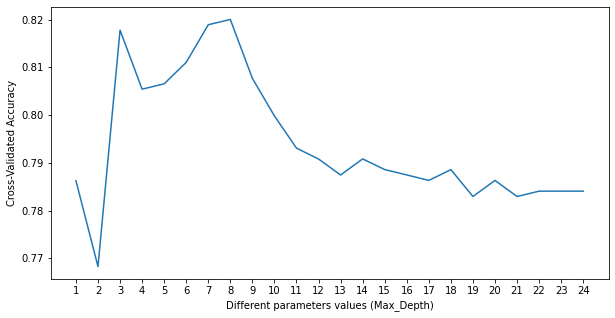

In [58]:
plt.figure(figsize=(10,5))
plt.plot(different_parameters, best_scores)
plt.xlabel("Different parameters values (Max_Depth)")
plt.ylabel("Cross-Validated Accuracy")

### from the plot above we pick the values (Max_Depth = 8)

In [59]:
decisionTree = DecisionTreeClassifier(max_depth=8, random_state=13)

y_pred = cross_val_predict(decisionTree, X_full, y_full, cv=10)
conf_mat = confusion_matrix(y_full, y_pred)
print(conf_mat)
print(classification_report(y_full, y_pred))
print("Cross-Validated Accuracy:", accuracy_score(y_full, y_pred))

cv_decisionTree_acc = accuracy_score(y_full, y_pred)
cv_decisionTree_recall = recall_score(y_full, y_pred)
cv_decisionTree_precision = precision_score(y_full, y_pred)

[[501  48]
 [112 228]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       549
           1       0.83      0.67      0.74       340

    accuracy                           0.82       889
   macro avg       0.82      0.79      0.80       889
weighted avg       0.82      0.82      0.82       889

Cross-Validated Accuracy: 0.8200224971878515


### 3) Random Forest model

In [60]:
#random initial hyper-parameters

from sklearn.ensemble import RandomForestClassifier 
clf_3 = RandomForestClassifier(n_estimators = 100, oob_score=True, n_jobs = -1, random_state=13)
clf_3.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=13)

In [61]:
randomForest_acc=accuracy_score(y_test, clf_3.predict(X_test))
print(randomForest_acc)

0.8059701492537313


In [62]:
randomForest_recall = recall_score(y_test, clf_3.predict(X_test))
print(randomForest_recall)

0.7254901960784313


In [63]:
randomForest_precision = precision_score(y_test, clf_3.predict(X_test))
print(randomForest_precision)

0.7551020408163265


In [64]:
#tuning the hyper-parameters using grid search
n_estimators_values = range(50, 150)
best_scores = []
different_parameters = []
for j in n_estimators_values:
    clf_3 = RandomForestClassifier(n_estimators = j, oob_score=True, n_jobs = -1, random_state=13)
    clf_3.fit(X_train,y_train)
    scores = accuracy_score(y_val, clf_3.predict(X_val))
    best_scores.append(scores)
    different_parameters.append(str(j))
print(best_scores)  

[0.7669172932330827, 0.7669172932330827, 0.7669172932330827, 0.7518796992481203, 0.7518796992481203, 0.7518796992481203, 0.7669172932330827, 0.7593984962406015, 0.7669172932330827, 0.7669172932330827, 0.7669172932330827, 0.7593984962406015, 0.7593984962406015, 0.7593984962406015, 0.7593984962406015, 0.7518796992481203, 0.7593984962406015, 0.7518796992481203, 0.7518796992481203, 0.7518796992481203, 0.7518796992481203, 0.7518796992481203, 0.7593984962406015, 0.7518796992481203, 0.7593984962406015, 0.7518796992481203, 0.7593984962406015, 0.7518796992481203, 0.7593984962406015, 0.7593984962406015, 0.7593984962406015, 0.7593984962406015, 0.7593984962406015, 0.7593984962406015, 0.7593984962406015, 0.7518796992481203, 0.7593984962406015, 0.7518796992481203, 0.7518796992481203, 0.7518796992481203, 0.7593984962406015, 0.7518796992481203, 0.7518796992481203, 0.7518796992481203, 0.7518796992481203, 0.7518796992481203, 0.7518796992481203, 0.7518796992481203, 0.7518796992481203, 0.7518796992481203,

Text(0, 0.5, 'test-train split Accuracy')

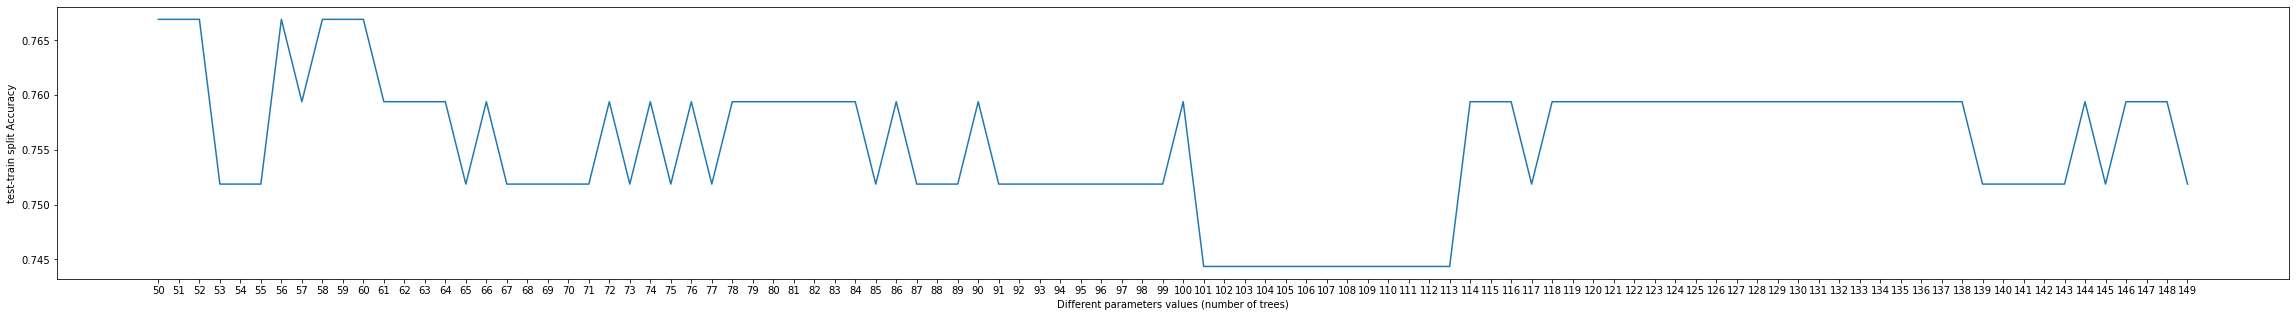

In [65]:
plt.figure(figsize=(40,5))
plt.plot(different_parameters, best_scores)
plt.xlabel("Different parameters values (number of trees)")
plt.ylabel("test-train split Accuracy")

In [66]:
clf_3 =RandomForestClassifier(n_estimators = 59, oob_score=True, n_jobs = -1, random_state= 13)
clf_3.fit(X_train,y_train)
randomForest_acc = accuracy_score(y_test, clf_3.predict(X_test))
randomForest_recall = recall_score(y_test, clf_3.predict(X_test))
randomForest_precision = precision_score(y_test, clf_3.predict(X_test))

print(randomForest_acc)
print(randomForest_recall)
print(randomForest_precision)

0.8059701492537313
0.7254901960784313
0.7551020408163265



###### using cross-validation 

In [68]:
#random initial hyper-parameters
randomForest = RandomForestClassifier(n_estimators = 100, oob_score=True, n_jobs = -1, random_state= 13)
rf_scores = cross_val_score(randomForest, X_full, y_full, cv=10, scoring='accuracy')
print (rf_scores.mean())

0.8088100102145047


In [74]:
#tuning the hyper-parameters using grid search & cv
n_estimators_values = range(40, 140)
best_scores = []
different_parameters = []
for j in n_estimators_values:
    randomForest = RandomForestClassifier(n_estimators = j, oob_score=True, n_jobs = -1, random_state=13)
    scores = cross_val_score(randomForest, X_full, y_full, cv=10, scoring='accuracy')
    best_scores.append(scores.mean())
    different_parameters.append(str(j))

Text(0, 0.5, 'Cross-Validated Accuracy')

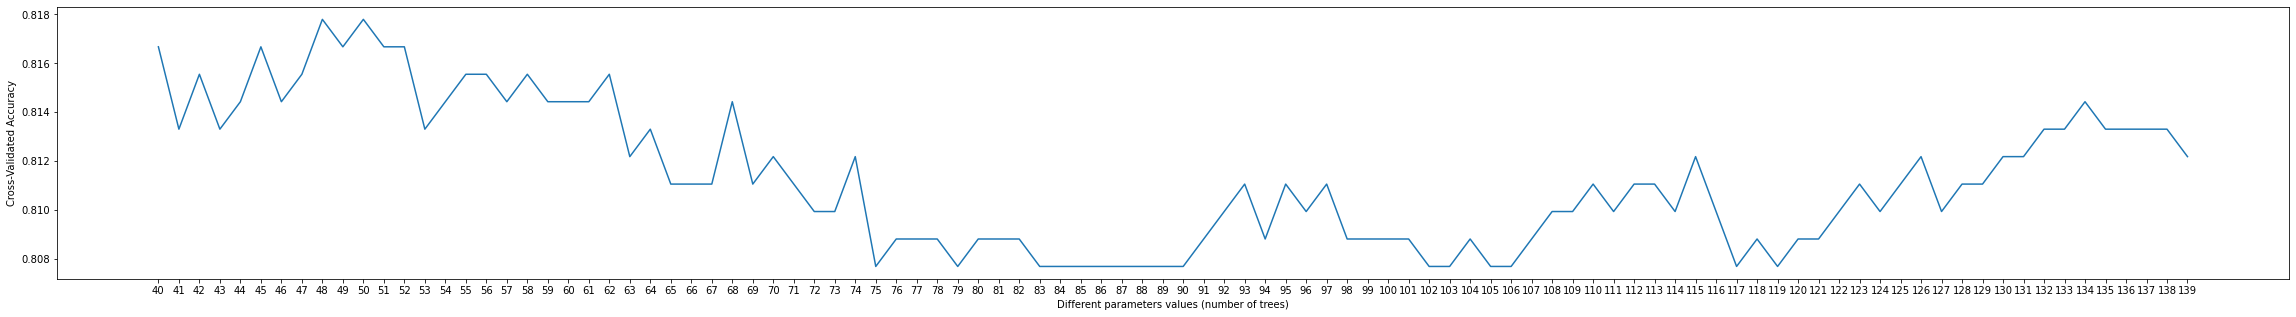

In [75]:
plt.figure(figsize=(40,5))
plt.plot(different_parameters, best_scores)
plt.xlabel("Different parameters values (number of trees)")
plt.ylabel("Cross-Validated Accuracy")

from the plot above we pick the values (n_estimators = 50)


In [76]:
randomForest = RandomForestClassifier(n_estimators = 50, oob_score=True, n_jobs = -1, random_state = 13)

y_pred = cross_val_predict(randomForest, X_full, y_full, cv=10)
conf_mat = confusion_matrix(y_full, y_pred)
print(conf_mat)
print(classification_report(y_full, y_pred))
print("Cross-Validated Accuracy:", accuracy_score(y_full, y_pred))

cv_randomForest_acc = accuracy_score(y_full, y_pred)
cv_randomForest_recall = recall_score(y_full, y_pred)
cv_randomForest_precision = precision_score(y_full, y_pred)

[[478  71]
 [ 91 249]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       549
           1       0.78      0.73      0.75       340

    accuracy                           0.82       889
   macro avg       0.81      0.80      0.80       889
weighted avg       0.82      0.82      0.82       889

Cross-Validated Accuracy: 0.8177727784026997


In [77]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Decision Tree',
             'Random Forest'],
    'Accuracy': [
        logisticRegression_acc, 
        decisionTree_acc,
        randomForest_acc],
    'Recall': [
        logisticRegression_recall, 
        decisionTree_recall,
        randomForest_recall],
    'Precision': [
        logisticRegression_precision, 
        decisionTree_precision,
        randomForest_precision]
    })
print("Accuracy scores using test-train split (without cross validation):-")
models

Accuracy scores using test-train split (without cross validation):-


,Model,Accuracy,Recall,Precision
0,Logistic Regression,0.791045,0.568627,0.828571
1,Decision Tree,0.791045,0.647059,0.767442
2,Random Forest,0.805970,0.725490,0.755102


In [78]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',
              'Decision Tree',
             'Random Forest'],
    'Accuracy': [
        cv_logisticRegression_acc, 
        cv_decisionTree_acc,
        cv_randomForest_acc],
    'Recall': [
        cv_logisticRegression_recall, 
        cv_decisionTree_recall,
        cv_randomForest_recall],
    'Precision': [
        cv_logisticRegression_precision, 
        cv_decisionTree_precision,
        cv_randomForest_precision]
    })
print("Accuracy scores (using cross validation):-")
models

Accuracy scores (using cross validation):-


,Model,Accuracy,Recall,Precision
0,Logistic Regression,0.808774,0.652941,0.810219
1,Decision Tree,0.820022,0.670588,0.826087
2,Random Forest,0.817773,0.732353,0.778125


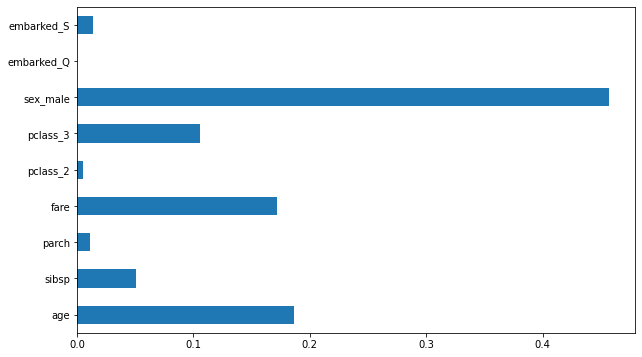

In [79]:
#feature importance for decision tree algo
feature_importance = pd.Series(clf_2.feature_importances_, index=X_train.columns)
feature_importance.plot(kind = 'barh', figsize=(10,6))

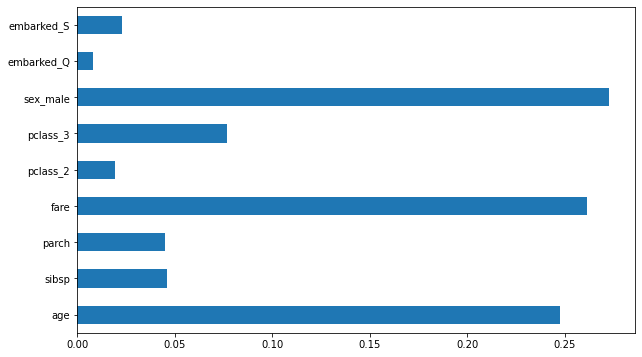

In [80]:
#feature importance for random forest algo
feature_importance = pd.Series(clf_3.feature_importances_, index=X_train.columns)
feature_importance.plot(kind = 'barh', figsize=(10,6))